In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
d = pd.read_table("./test_sample", delim_whitespace=True)
d.dropna(inplace=True)

Normalize and remove mean from independent and dependent variables

In [3]:
ivs = d.loc[:, "Fric":"RES"]
mn = d.min(axis=0)
mx = d.max(axis=0)
ivs_nrm = (ivs - mn) / (mx - mn) - 0.5

dvs = d.loc[:, "2%":"Hig"]
dvs -= dvs.mean(axis=0)

Least-squares multiple linear regression of dependent variables onto independent variables

In [4]:
coeffs = np.linalg.lstsq(ivs, dvs, rcond=None)[0]
prediction = ivs @ coeffs
prediction.columns = dvs.columns

Matrix of regression coefficients; largest contributor to variability is clearly friction

In [5]:
coeffs

array([[-6.9791381 , -1.71705841, -6.30527246, -4.85999435],
       [ 0.47538948, -0.06526814,  0.56109612,  0.32507226],
       [ 0.02489387, -0.00876476,  0.02141338,  0.04349184],
       [ 0.04112896,  0.02811659,  0.03073911,  0.01663741]])

Plot the results from SWASH and compare to what is predicted from regression; pretty good, but some clear differences suggesting there may be some nonlinear interaction between the various predictors 

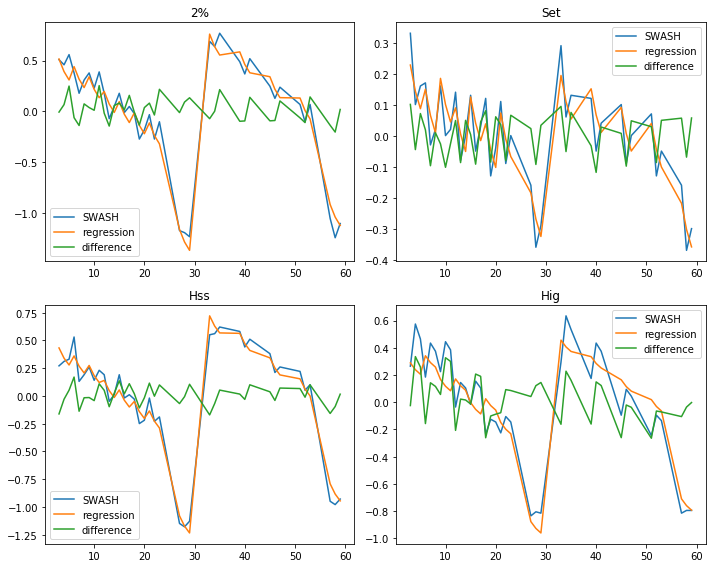

In [6]:
def scratch_regression_plot(ax, v):
    ax.plot(dvs[v], label="SWASH")
    ax.plot(prediction[v], label="regression")
    ax.plot(dvs[v] - prediction[v], label="difference")
    ax.legend()
    ax.set_title(v)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
for k, v in enumerate(dvs.columns):
    scratch_regression_plot(axes[k], v)

fig.tight_layout()